In [ ]:
## DETAILS ##
# CSCI 444: Project 2
# Sam Donnermeyer

## Data set 
# https://www.kaggle.com/mloey1/ahcd1

# Building a model to predict the classification of images of written arabic characters. 

In [20]:
# Import Libraries #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
# List of arabic characters
arabic_characters = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                    'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
                    'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']



print(len(arabic_characters))

28


In [16]:
# Import Data 
x_train = pd.read_csv("data/character_dataset/csvTrainImages 13440x1024.csv") #,header=None)
y_train = pd.read_csv("data/character_dataset/csvTrainLabel 13440x1.csv") #,header=None)

x_test = pd.read_csv("data/character_dataset/csvTestImages 3360x1024.csv")#,header=None)
y_test = pd.read_csv("data/character_dataset/csvTestLabel 3360x1.csv")#,header=None)


print("x_train.shape =", x_train.shape, "\ny_train.shape =", y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (13439, 1024) 
y_train.shape = (13439, 1) 
x_test.shape = (3359, 1024) 
y_test.shape = (3359, 1)


In [17]:
# Normalize & Reshape train/test 
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

y_train = y_train.values.reshape(13439,)

x_train = x_train.values.reshape(-1,32,32,1)
x_test = x_test.values.reshape(-1,32,32,1)

print(y_train.shape)
print(y_train.shape)

(13439, 1)
(13439,)


In [18]:
# Make train/test dataframes into categorical
y_train = to_categorical(y_train, num_classes = 29)
y_test = to_categorical(y_test, num_classes = 29)

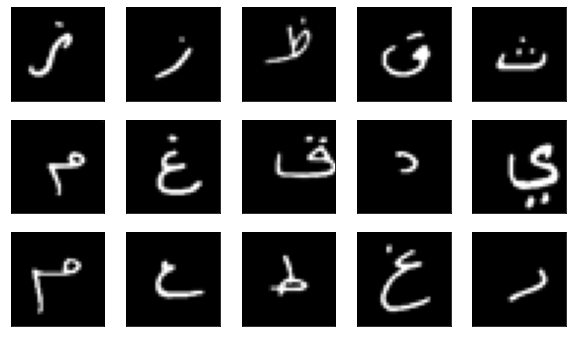

In [34]:
# Show sample images
ra = np.random.randint(0, x_train.shape[0], size=25)
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32).T,"gray")
plt.show()

In [21]:
## CREATE CNN MODEL ##
model = keras.Sequential()

# Add layers
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (32,32,1)))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

# Add layers
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.25))

# Add layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(29, activation = "softmax"))

# Compile Model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        832       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [22]:
# Fit the model to the data
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs=10)

Epoch 1/10
420/420 [==============================] - 91s 213ms/step - loss: 2.0264 - accuracy: 0.3755 - val_loss: 0.8967 - val_accuracy: 0.7300
Epoch 2/10
420/420 [==============================] - 89s 211ms/step - loss: 0.9584 - accuracy: 0.6820 - val_loss: 0.5188 - val_accuracy: 0.8327
Epoch 3/10
420/420 [==============================] - 128s 305ms/step - loss: 0.6877 - accuracy: 0.7719 - val_loss: 0.3947 - val_accuracy: 0.8875
Epoch 4/10
420/420 [==============================] - 88s 209ms/step - loss: 0.5251 - accuracy: 0.8274 - val_loss: 0.3045 - val_accuracy: 0.9053
Epoch 5/10
420/420 [==============================] - 85s 202ms/step - loss: 0.4338 - accuracy: 0.8536 - val_loss: 0.2684 - val_accuracy: 0.9172
Epoch 6/10
420/420 [==============================] - 87s 206ms/step - loss: 0.3716 - accuracy: 0.8767 - val_loss: 0.2409 - val_accuracy: 0.9265
Epoch 7/10
420/420 [==============================] - 83s 197ms/step - loss: 0.3160 - accuracy: 0.8934 - val_loss: 0.2294 - val_a

In [23]:
# Evaluate Model (loss & Accuracy)
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

105/105 [==============================] - 4s 39ms/step - loss: 0.1806 - accuracy: 0.9485
0.180643692612648 0.9484965801239014


In [24]:
# Get results from prediction using model
results = model.predict(x_test)

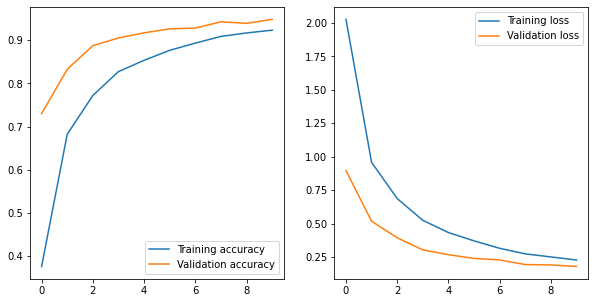

In [29]:
### CREATE Visualizations of Model Metrics ###

# Display accuracy and losses
fig, (a1,a2) = plt.subplots(1,2,figsize=(10,5))

a1.plot(history.history["accuracy"], label="Training accuracy")
a1.plot(history.history["val_accuracy"], label="Validation accuracy")
a1.legend()

a2.plot(history.history["loss"], label="Training loss")
a2.plot(history.history["val_loss"], label="Validation loss")
a2.legend()

plt.show()


Test Accuracy:  0.9484965763620125


<AxesSubplot:>

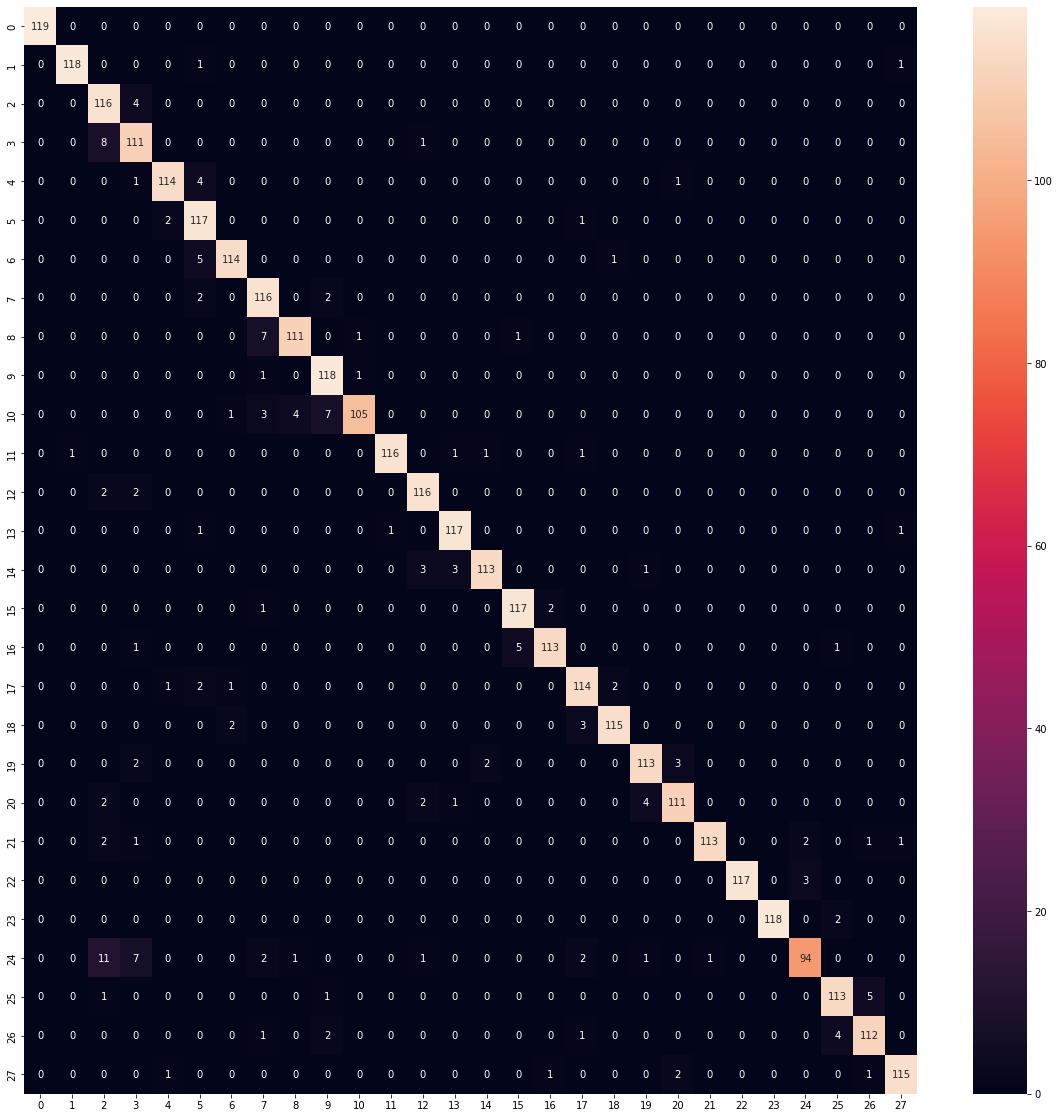

In [28]:
## Test Accuracy of model on testing data

y_pred = model.predict(x_test)
y_obs = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

test_acc = accuracy_score(y_true, y_obs)

# Create Confusion matrix 
cm = confusion_matrix(y_true, y_obs)

print("Test Accuracy: ",test_acc)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt="d", ax=ax)